Q. 11. 

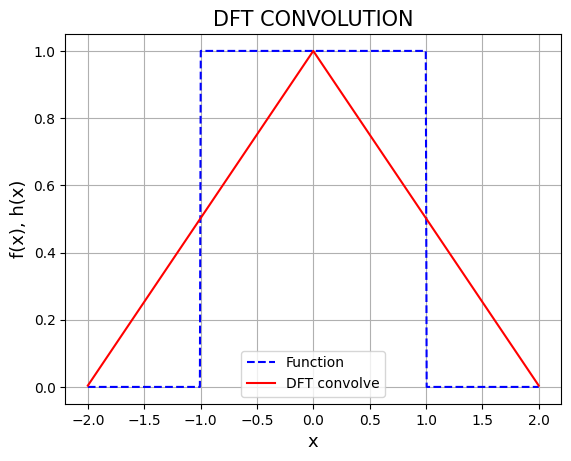

In [2]:
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt

def f(x): #The rectangular pulse function
    out = np.zeros(len(x),dtype=np.float64)
    for i in range(len(x)):
        if (-1.0 < x[i] and x[i] < 1.0):
            out[i] = 1.0
    return out

x_min = -2.0 # the effective range of function necessary
x_max = 2.0
n = 512 # number of points (will be doubled while zero padding)
x = np.linspace(x_min, x_max, n)
d = (x_max - x_min) / n 

# Zero-padding
f_x = np.zeros(2 * n - 1, dtype=np.float64)
g_x = np.zeros(2 * n - 1, dtype=np.float64)
h = np.zeros(2 * n - 1, dtype=np.float64)

f_x[:n] = f(x)
g_x[:n] = f(x)

# Compute convolution using FFT
h = (d / 2.0) * np.sqrt(2 * n - 1) * (
    ft.ifft(ft.fft(f_x, norm='ortho') * ft.fft(g_x, norm='ortho'), norm='ortho')
)

# Plotting
plt.title("DFT CONVOLUTION", size=15)
plt.plot(x, f_x[:n], '--', color='blue', label="Function")
plt.plot(np.linspace(x_min, x_max, n - 1), h[(n - 1) - n // 2 + 1 : (n - 1) + n // 2].real, color='red', label="DFT convolve")
plt.xlabel("x", size=13)
plt.ylabel("f(x), h(x)", size=13)
plt.legend()
plt.grid()
plt.show()
